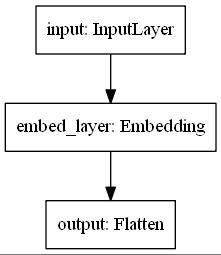

In [15]:
from keras.layers import Input, Dense, Embedding, Flatten
from keras.models import Model
from keras.utils import plot_model
n_teams=10887
input=Input(shape=(1,), name='input')
embed_layer=Embedding(input_dim=n_teams, input_length=1, output_dim=1, name='embed_layer')
embed_tensor=embed_layer(input)
output=Flatten(name='output')(embed_tensor)
model=Model(input, output)
plot_model(model, to_file=r'C:/Users/jithi/Desktop/nn3.jpg')

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 61, 61, 32)   544         input_22[0][0]                   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 57, 57, 16)   1040        input_22[0][0]                   
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 30, 30, 32)   0           conv2d[0][0]                     
______________________________________________________________________________________

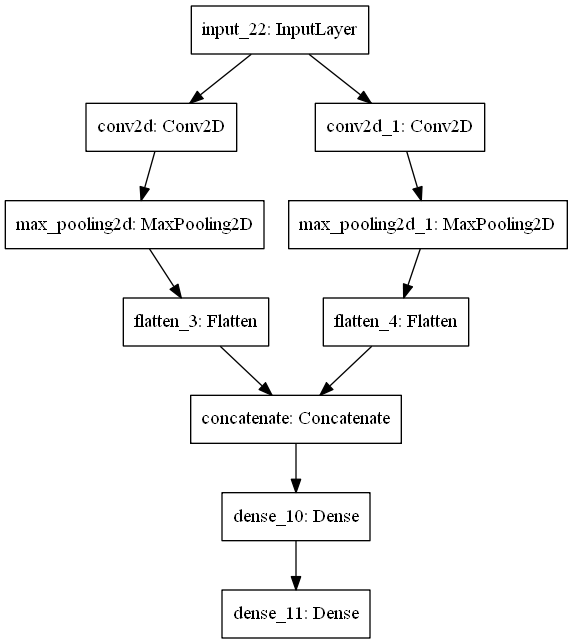

In [27]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
# input layer
visible = Input(shape=(64,64,1))
# first feature extractor
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)
# second feature extractor
conv2 = Conv2D(16, kernel_size=8, activation='relu')(visible)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat2 = Flatten()(pool2)
# merge feature extractors
merge = concatenate([flat1, flat2])
# interpretation layer
hidden1 = Dense(10, activation='relu')(merge)
# prediction output
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='shared_input_layer.png')

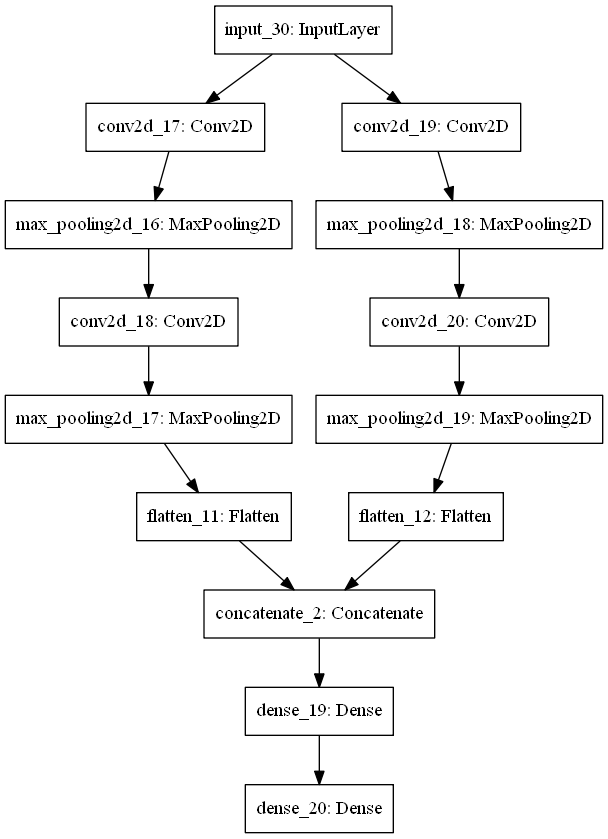

In [38]:
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
input=Input(shape=(64, 64, 1))
conv1=Conv2D(32, kernel_size=4, activation='relu')(input)
pool1=MaxPooling2D(pool_size=(4,4))(conv1)
conv2=Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2=MaxPooling2D(pool_size=(4,4))(conv2)
flat=Flatten()(pool2)
conv_1=Conv2D(32, kernel_size=4, activation='relu')(input)
pool_1=MaxPooling2D(pool_size=(4,4))(conv_1)
conv_2=Conv2D(16, kernel_size=4, activation='relu')(pool_1)
pool_2=MaxPooling2D(pool_size=(4,4))(conv_2)
flat_=Flatten()(pool_2)
merge=concatenate([flat, flat_])

hidden=Dense(10, activation='relu')(merge)
output=Dense(10, activation='sigmoid')(hidden)
model=Model(input, output)
plot_model(model, to_file='nn4.png')